**Author: Ntigkaris E. Alexandros**

*Description:* Demonstrating the inner workings of a neural network, applied on two popular sklearn datasets.

In [1]:
from sklearn.datasets import load_iris,load_breast_cancer

from sklearn.linear_model import LogisticRegression
from SNN import SNN

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

from warnings import simplefilter; simplefilter("ignore")

**1. The Iris dataset** *(Multiclass classification)*

In [2]:
df = load_iris()
features = df.data
targets = df.target
scaler = RobustScaler()
scaler.fit(features)
features = scaler.transform(features)

X_train , X_test , y_train , y_test = train_test_split(features,targets,stratify=targets,random_state=0)

n1 = SNN(
            input_layer=4,
            output_layer=3,
            hidden_layer=64,
            learning_rate=.5,
            epochs=50,
            random_state=0,
            verbose=True,
            activation_fn="sigmoid",
        )
n1.fit(X_train,y_train)
print(f"\nAccuracy with neural network: {n1.score(X_test,y_test)}")

r1 = LogisticRegression(penalty='l2',random_state=0)
r1.fit(X_train,y_train)
print(f"\nAccuracy with logistic regression: {r1.score(X_test,y_test)}")

Epoch 1/50:	Calculating...	Error: 0.6850627425353681
Epoch 2/50:	Calculating...	Error: 0.3442104626272904
Epoch 3/50:	Calculating...	Error: 0.31650566205379366
Epoch 4/50:	Calculating...	Error: 0.30039356173997583
Epoch 5/50:	Calculating...	Error: 0.28716416624739066
Epoch 6/50:	Calculating...	Error: 0.27695218411163786
Epoch 7/50:	Calculating...	Error: 0.26901593040914346
Epoch 8/50:	Calculating...	Error: 0.26237383182484053
Epoch 9/50:	Calculating...	Error: 0.2563769173603732
Epoch 10/50:	Calculating...	Error: 0.25069699245343174
Epoch 11/50:	Calculating...	Error: 0.2451977996372504
Epoch 12/50:	Calculating...	Error: 0.2398565871727132
Epoch 13/50:	Calculating...	Error: 0.2347334674058675
Epoch 14/50:	Calculating...	Error: 0.22995255182527277
Epoch 15/50:	Calculating...	Error: 0.22566421405234818
Epoch 16/50:	Calculating...	Error: 0.22198534967556477
Epoch 17/50:	Calculating...	Error: 0.21895094098842174
Epoch 18/50:	Calculating...	Error: 0.21651312135374623
Epoch 19/50:	Calculating.

**2. The Breast Cancer dataset** *(Binary classification)*

In [3]:
df = load_breast_cancer()
features = df.data
targets = df.target
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

X_train , X_test , y_train , y_test = train_test_split(features,targets,stratify=targets,random_state=0)

n2 = SNN(
            input_layer=30,
            output_layer=2,
            hidden_layer=64,
            learning_rate=.1,
            epochs=25,
            random_state=0,
            verbose=True,
            error_type="ESS",
            activation_fn="sigmoid",
        )
n2.fit(X_train,y_train)
print(f"\nAccuracy with neural network: {n2.score(X_test,y_test)}")

r2 = LogisticRegression(penalty='none',random_state=0)
r2.fit(X_train,y_train)
print(f"\nAccuracy with logistic regression: {r2.score(X_test,y_test)}")

Epoch 1/25:	Calculating...	Error: 54.96642616042189
Epoch 2/25:	Calculating...	Error: 11.643757623753663
Epoch 3/25:	Calculating...	Error: 8.984504098683294
Epoch 4/25:	Calculating...	Error: 7.627611691569838
Epoch 5/25:	Calculating...	Error: 6.888211180785808
Epoch 6/25:	Calculating...	Error: 6.445099179933422
Epoch 7/25:	Calculating...	Error: 6.154004128834797
Epoch 8/25:	Calculating...	Error: 5.943953034748593
Epoch 9/25:	Calculating...	Error: 5.776352036334906
Epoch 10/25:	Calculating...	Error: 5.63246260386186
Epoch 11/25:	Calculating...	Error: 5.507310463769753
Epoch 12/25:	Calculating...	Error: 5.401750148608992
Epoch 13/25:	Calculating...	Error: 5.315611851744588
Epoch 14/25:	Calculating...	Error: 5.246181014439028
Epoch 15/25:	Calculating...	Error: 5.1894084930132625
Epoch 16/25:	Calculating...	Error: 5.141484643960143
Epoch 17/25:	Calculating...	Error: 5.099665765180333
Epoch 18/25:	Calculating...	Error: 5.062330615311823
Epoch 19/25:	Calculating...	Error: 5.028765750710994
E

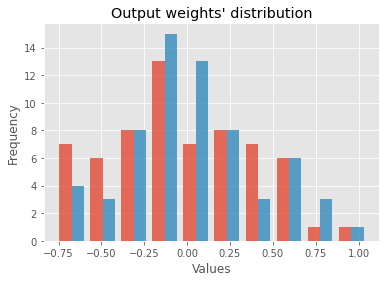

----------------------------------------
Epochs performed: 25
Final error ('ESS'): 4.911197075693444
Input nodes used: 30
Hidden nodes used: 64
Output nodes used: 2
Activation function: sigmoid
Algorithm's learning rate: 0.1
----------------------------------------


In [4]:
n2._diagnostics()